## Series Temporales
## HW FINAL: Reservas Hotel
Borja Lacalle

### Preprocesamiento

In [88]:
## leer el dataset H2.csv

import pandas as pd
import numpy as np

data = pd.read_csv('H2.csv', sep=',', header=0)

# ver información del dataset
print(data.info())
# ver los primeros registros
data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [89]:
# Ver si hay NA´s en nuestros datos 
missing_data = data.isnull().sum()
print(missing_data)

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [90]:
# rellenar los NA´s con la moda en la columna Country y con la mediana en la columna Children
data['Country'] = data['Country'].fillna(data['Country'].mode()[0])
data['Children'] = data['Children'].fillna(data['Children'].median())

In [91]:
# Crear la nueva columna 'Fecha'
data['Fecha'] = pd.to_datetime(data['ArrivalDateYear'].astype(str) + '-' + data['ArrivalDateMonth'] + '-' + data['ArrivalDateDayOfMonth'].astype(str), format='%Y-%B-%d')

# El formato '%Y-%B-%d' representa Año-Mes-Día

# Visualizar el DataFrame
print(data[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth', 'Fecha']])

       ArrivalDateYear ArrivalDateMonth  ArrivalDateDayOfMonth      Fecha
0                 2015             July                      1 2015-07-01
1                 2015             July                      1 2015-07-01
2                 2015             July                      1 2015-07-01
3                 2015             July                      1 2015-07-01
4                 2015             July                      2 2015-07-02
...                ...              ...                    ...        ...
79325             2017           August                     30 2017-08-30
79326             2017           August                     31 2017-08-31
79327             2017           August                     31 2017-08-31
79328             2017           August                     31 2017-08-31
79329             2017           August                     29 2017-08-29

[79330 rows x 4 columns]


In [92]:
#fecha como indice
data.set_index('Fecha', inplace=True)
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
Fecha,,,,,,,,,,,,,,,,,,,,,
2015-07-01,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
2015-07-01,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2015-07-01,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
2015-07-01,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
2015-07-02,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
2017-08-31,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
2017-08-31,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07


In [93]:
# Eliminar las columnas que no nos sirven
data = data.drop(['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth','Meal', 'Country', 'MarketSegment', 'DistributionChannel','IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests'], axis=1)

In [94]:
# crear columnas adicionales para contar reservas y cancelaciones con la columna 'IsCanceled' (1: cancelación, 0: reserva)
data['Reservas'] = data['IsCanceled'].apply(lambda x: 1 if x == 0 else 0)
data['Cancelaciones'] = data['IsCanceled'].apply(lambda x: 1 if x == 1 else 0)

# Agrupar por semana y realizar la suma
reservas_semanales = data.resample('W').sum()[['Reservas']]
cancelaciones_semanales = data.resample('W').sum()[['Cancelaciones']]

reservas_semanales

,Reservas
Fecha,
2015-07-05,85
2015-07-12,61
2015-07-19,124
2015-07-26,134
2015-08-02,77
...,...
2017-08-06,452
2017-08-13,442
2017-08-20,465


In [ ]:
# Guardar las tablas de reservas y cancelaciones en archivos CSV
reservas_semanales.to_csv('reservas_semanales.csv')
cancelaciones_semanales.to_csv('cancelaciones_semanales.csv')

### Gráficos (Analisis preliminar)

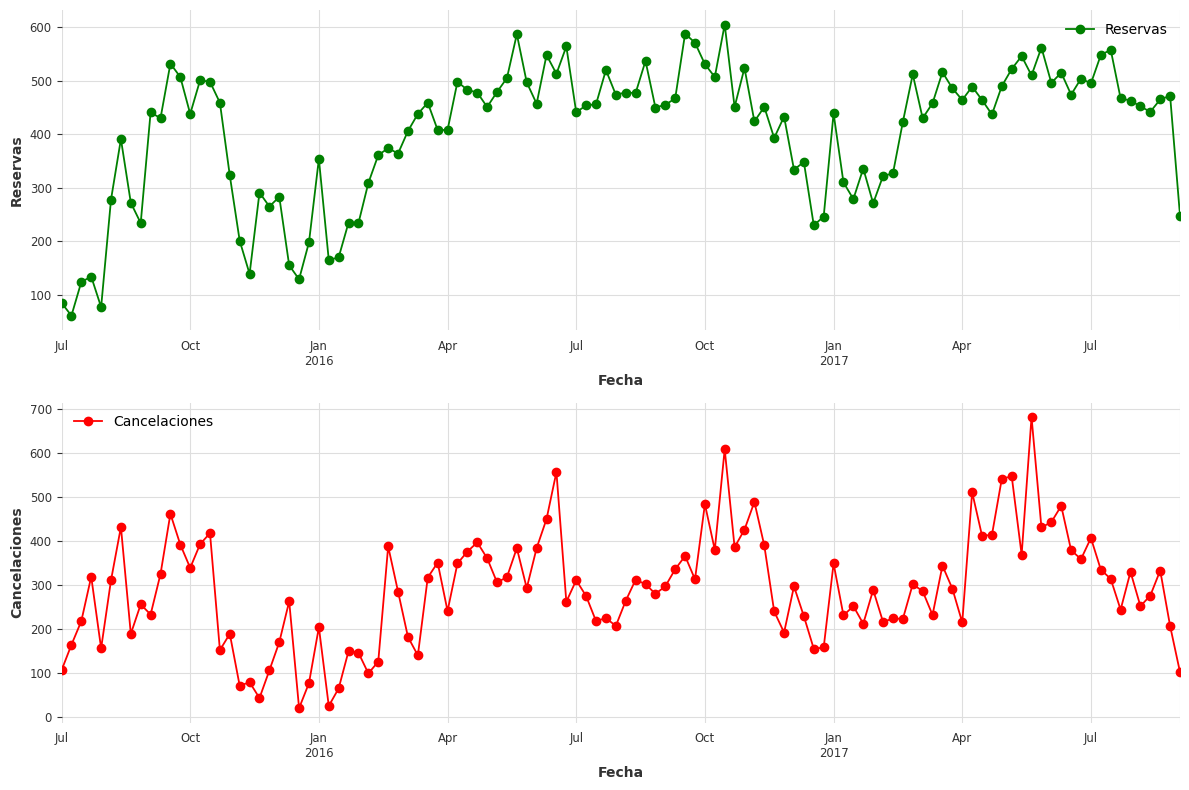

In [ ]:
from matplotlib import pyplot as plt

# graficos de reservas y cancelaciones en subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

#reservas en color azul
reservas_semanales.plot(ax=ax[0], y='Reservas', marker='o', linestyle='-', color = 'g')
ax[0].set_ylabel('Reservas')

#cancelaciones en color rojo
cancelaciones_semanales.plot(ax=ax[1], y='Cancelaciones', marker='o', linestyle='-', color='r')
ax[1].set_ylabel('Cancelaciones')


# cancelaciones_semanales.plot(ax=ax[1], y='Cancelaciones', marker='o', linestyle='-')
# ax[1].set_ylabel('Cancelaciones')

plt.tight_layout()
plt.show()

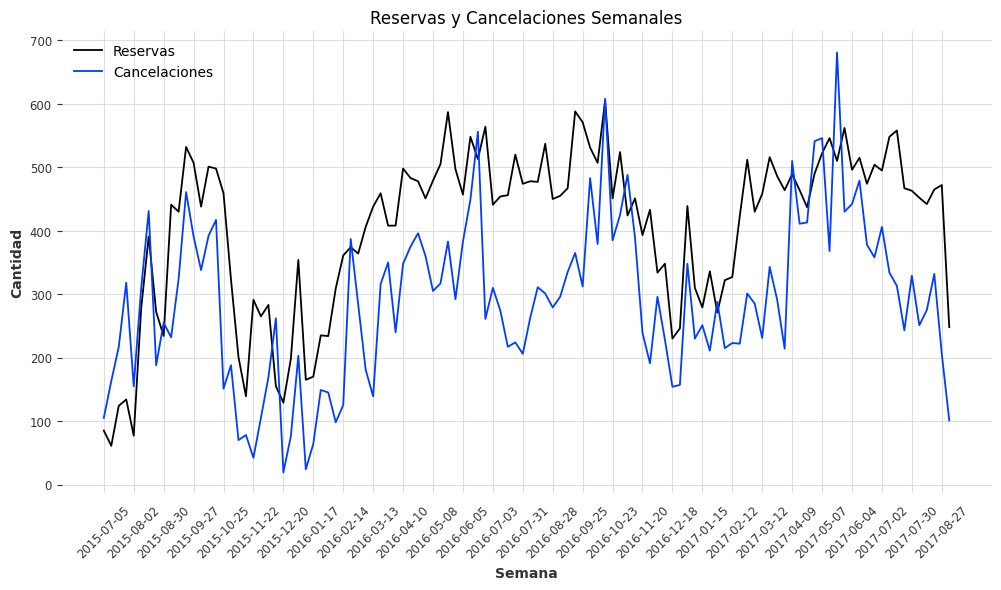

In [ ]:
#visualizar las cancelaciones y reservas en un solo gráfico
plt.figure(figsize=(12, 6))
plt.plot(reservas_semanales.index, reservas_semanales['Reservas'], label='Reservas')
plt.plot(cancelaciones_semanales.index, cancelaciones_semanales['Cancelaciones'], label='Cancelaciones')
plt.title('Reservas y Cancelaciones Semanales')
plt.xlabel('Semana')
plt.ylabel('Cantidad')
plt.xticks(reservas_semanales.index[::4], rotation=45)
plt.legend()
plt.show()


**Componente Estacional**  
Reservas:

Parece haber una componente estacional en las reservas, con aumentos y disminuciones en ciertas épocas del año. Por ejemplo, hay incrementos regulares en verano y en otros períodos específicos.
Cancelaciones:

La serie de cancelaciones también muestra un patrón estacional, con aumentos significativos en ciertas épocas del año. Esto puede indicar que las cancelaciones están influidas por la misma estacionalidad que afecta a las reservas.

**Estacionariedad**  
Para determinar si una serie es estacionaria, examinamos si sus propiedades estadísticas, como la media y la varianza, son constantes a lo largo del tiempo.

Media:

Ambas series muestran cambios en la media a lo largo del tiempo. Por ejemplo, las reservas muestran una media más alta después de 2016 en comparación con el período anterior.
Las cancelaciones también muestran variaciones en la media, con incrementos significativos en ciertos períodos.  

Varianza:

Las fluctuaciones en ambas series sugieren que la varianza no es constante. Esto es especialmente evidente en las cancelaciones, donde los picos son bastante pronunciados.  

**Diferenciación:**

Para lograr estacionariedad, podría ser necesario aplicar una diferenciación a ambas series. Esto ayudará a estabilizar la media y la varianza, haciendo las series más adecuadas para el modelado ARIMA.

In [ ]:
# print de la media de reservas y cancelaciones con dos decimales
print(f"La media de reservas semanales es: {reservas_semanales['Reservas'].mean():.2f}")
print(f"La media de cancelaciones semanales es: {cancelaciones_semanales['Cancelaciones'].mean():.2f}")

La media de reservas semanales es: 405.51
La media de cancelaciones semanales es: 290.37


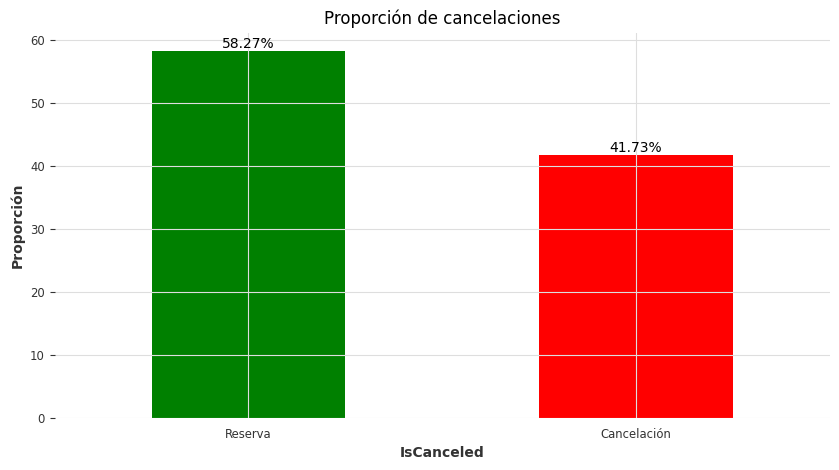

In [ ]:
# Grafico de la tasa de reservas y cancelaciones
tasa = data['IsCanceled'].value_counts(normalize=True)*100
tasa.plot(kind='bar', color=['green', 'red'], figsize=(10, 5))
plt.ylabel('Proporción')
plt.title('Proporción de cancelaciones')
plt.xticks([0, 1], ['Reserva', 'Cancelación'], rotation=0)
for i, value in enumerate(data['IsCanceled'].value_counts(normalize=True)*100):
    plt.text(i, value, f'{value:.2f}%', ha = 'center', va = 'bottom')

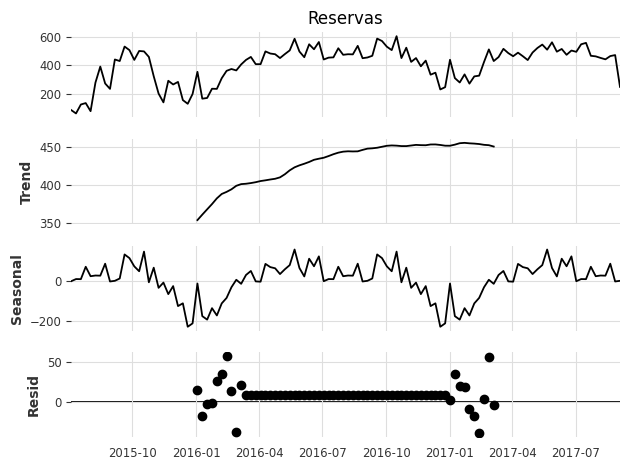

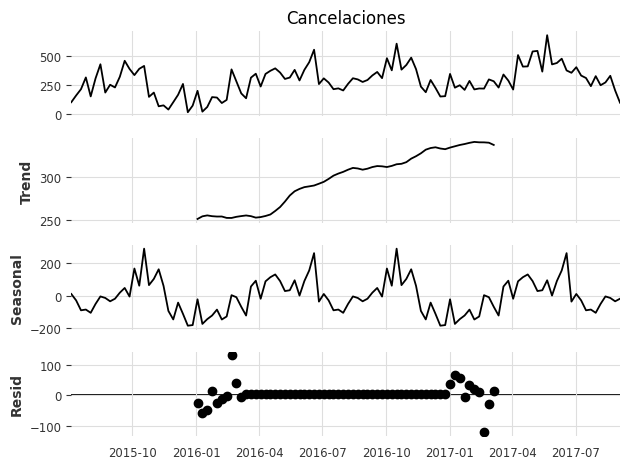

In [ ]:
# grafico del comportamiento estacional de las reservas con sm de statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(reservas_semanales['Reservas'], model='additive', period=52) 
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(cancelaciones_semanales['Cancelaciones'], model='additive', period=52) 
fig = decomposition.plot()
plt.show()


#### TRANSFORMACIONES Y DIFERENCIACIÓN

In [ ]:
# aplicar la tranformacion logaritmica a la serie cancelaciones para estabilizar la varianza. en las serie de reservas no lo vemos necesario

from sktime.transformations.series.boxcox import LogTransformer
log_transformer = LogTransformer()
cancelaciones_semanales_log = log_transformer.fit_transform(cancelaciones_semanales)
reservas_semanales_log = log_transformer.fit_transform(reservas_semanales)

cancelaciones_semanales_log.tail()

,Cancelaciones
Fecha,
2017-08-06,5.525453
2017-08-13,5.616771
2017-08-20,5.805135
2017-08-27,5.327876
2017-09-03,4.615121


Text(0.5, 1.0, 'cancelaciones semanales: Transformación LOG')

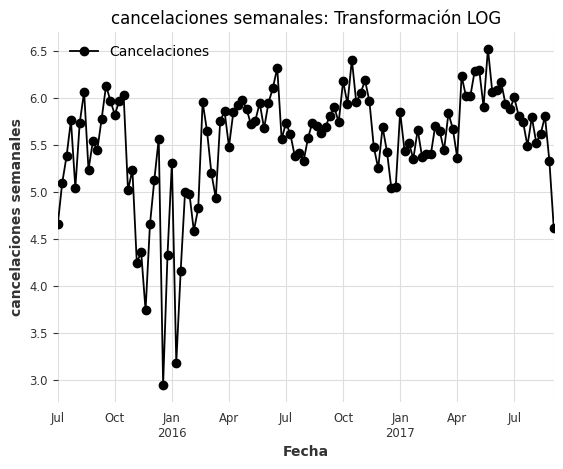

In [ ]:
# Plot Log Data
ax = cancelaciones_semanales_log.plot(marker='o', linestyle='-')
ax.set_ylabel('cancelaciones semanales')
ax.set_title('cancelaciones semanales: Transformación LOG')

In [ ]:
# pureba de estacionaridad con la prueba de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller


# Prueba de Dickey-Fuller aumentada para la serie de reservas
result_reservas = adfuller(reservas_semanales['Reservas'])
print('ADF Statistic for reservas:', result_reservas[0])
print('p-value for reservas:', result_reservas[1])

# Prueba de Dickey-Fuller aumentada para la serie de cancelaciones
result_cancelaciones = adfuller(cancelaciones_semanales['Cancelaciones'])
print('ADF Statistic for cancelaciones:', result_cancelaciones[0])
print('p-value for cancelaciones:', result_cancelaciones[1])




ADF Statistic for reservas: -3.007928635519084
p-value for reservas: 0.034160570384279804
ADF Statistic for cancelaciones: -2.8770768086161698
p-value for cancelaciones: 0.048079327274718774


**El test Dickey-Fuller contrasta la Ho: la serie no es estacionaria**

dado que el p-value es muy pequeño podemos rechazar la hipotesis nula y por tanto podemos concluir que la serie es estacionaria.

de todas formas, dado que graficamente habiamos deducido que no eran estacionarias y que el p valor esta muy cerca del nivel de significacion elegido (0.05), vamos a hacer ajustar el modelo con la serie diferenciada y sin diferenciar para ver si realmente hay diferencias si quitamos una supuesta estacionariedad

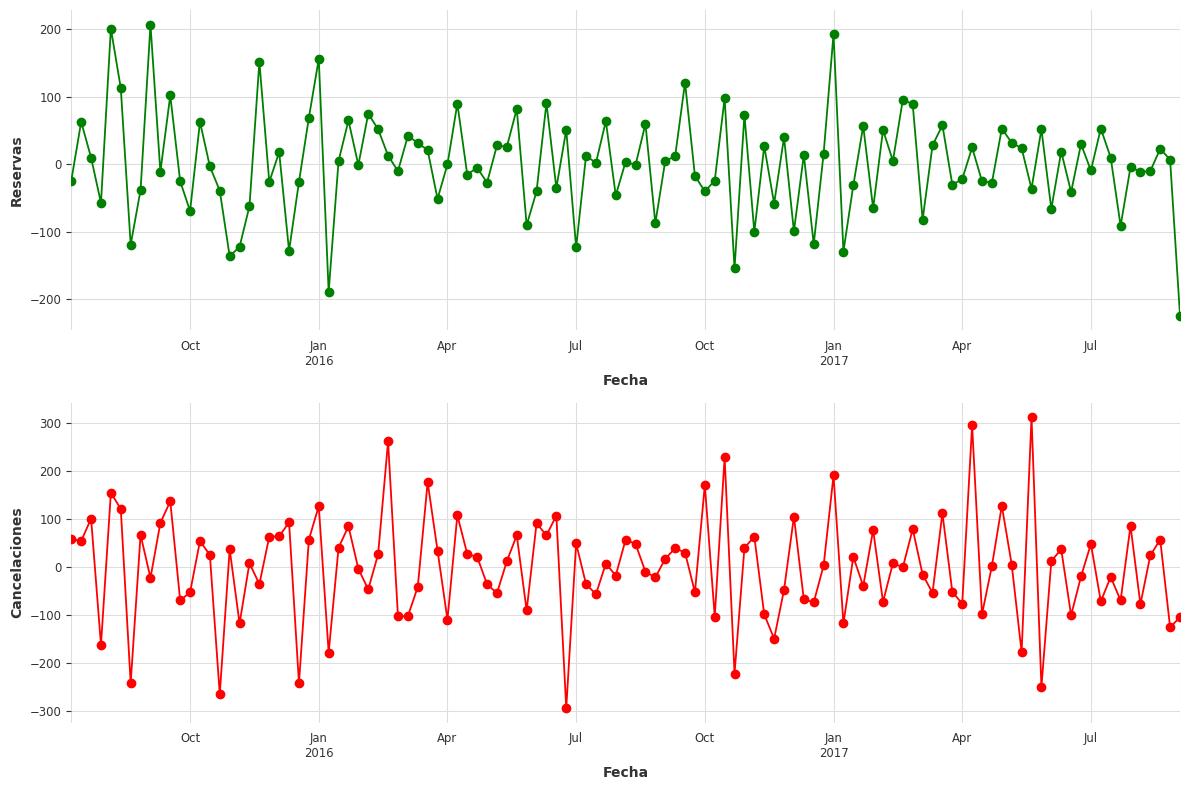

In [ ]:
# diferenciar la serie de reservas y cancelaciones para hacerla estacionaria
reservas_diff = reservas_semanales['Reservas'].diff().dropna()
cancelaciones_diff = cancelaciones_semanales['Cancelaciones'].diff().dropna()

# graficar las series diferenciadas por separado en subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
reservas_diff.plot(ax=ax[0], marker='o', linestyle='-', color='g')
ax[0].set_ylabel('Reservas')
cancelaciones_diff.plot(ax=ax[1], marker='o', linestyle='-', color='r')
ax[1].set_ylabel('Cancelaciones')
plt.tight_layout()
plt.show()


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

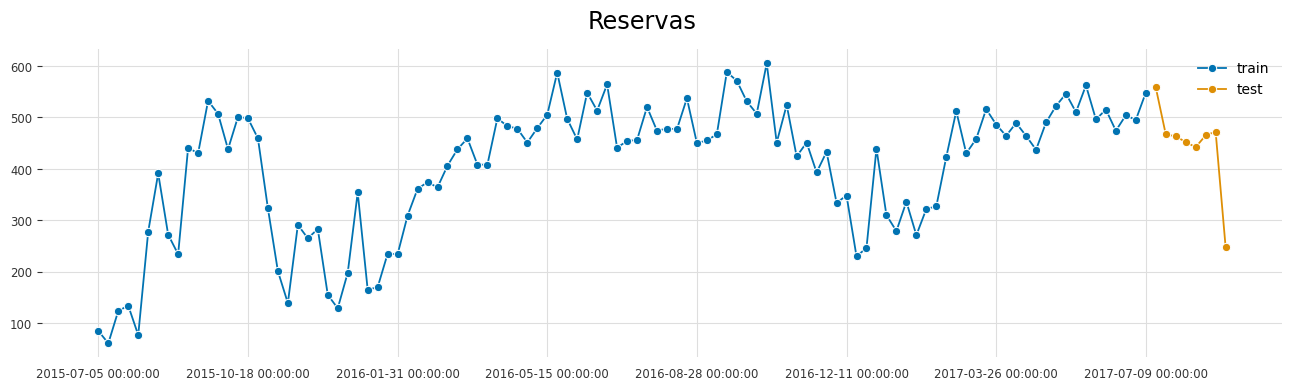

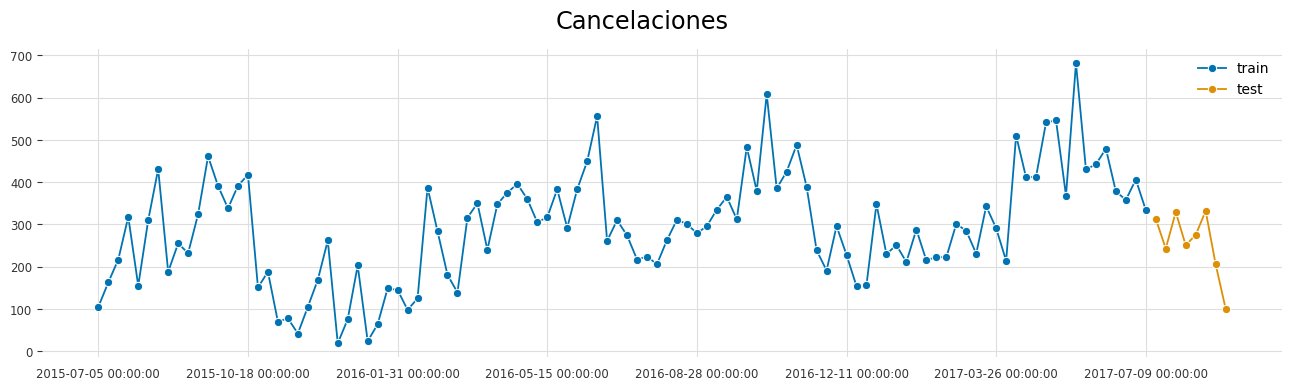

In [ ]:
# dividir los datos en entrenamiento y prueba (106 y 8) para las series diferenciadas con temporal_train_test_split
from sktime.forecasting.model_selection import temporal_train_test_split

reservas_train, reservas_test = temporal_train_test_split(reservas_semanales, test_size=8)
cancelaciones_train, cancelaciones_test = temporal_train_test_split(cancelaciones_semanales, test_size=8)

# graficar las series de entrenamiento y prueba con plot_series
from sktime.utils.plotting import plot_series

plot_series(reservas_train, reservas_test, labels=['train', 'test'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, labels=['train', 'test'], title='Cancelaciones')



In [ ]:
# hacemos los logaritmos por si las tuviesemos que usar despues
reservas_train_log, reservas_test_log = temporal_train_test_split(reservas_semanales_log, test_size=8)
cancelaciones_train_log, cancelaciones_test_log = temporal_train_test_split(cancelaciones_semanales_log, test_size=8)


### MODELOS PREDICITVOS UNIVARIANTES

#### ETS

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/TimeSeries/.conda/lib/py

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

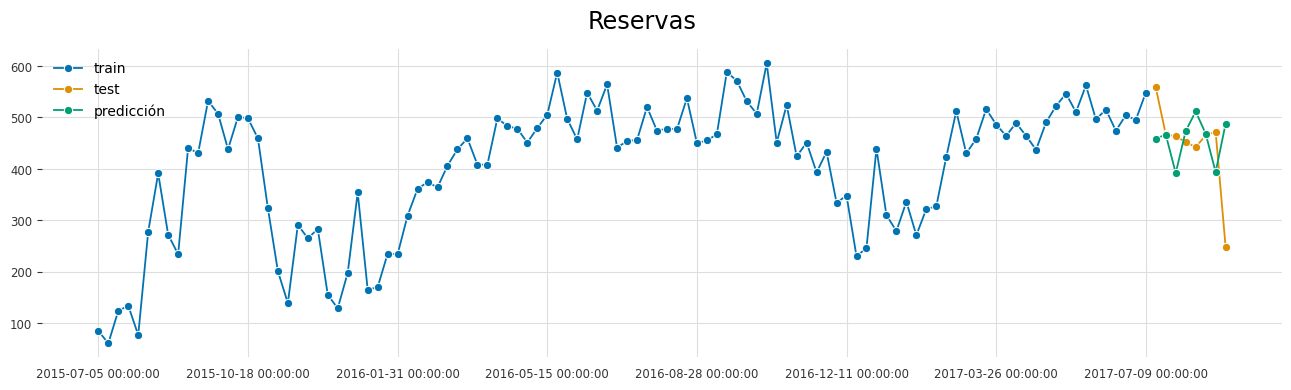

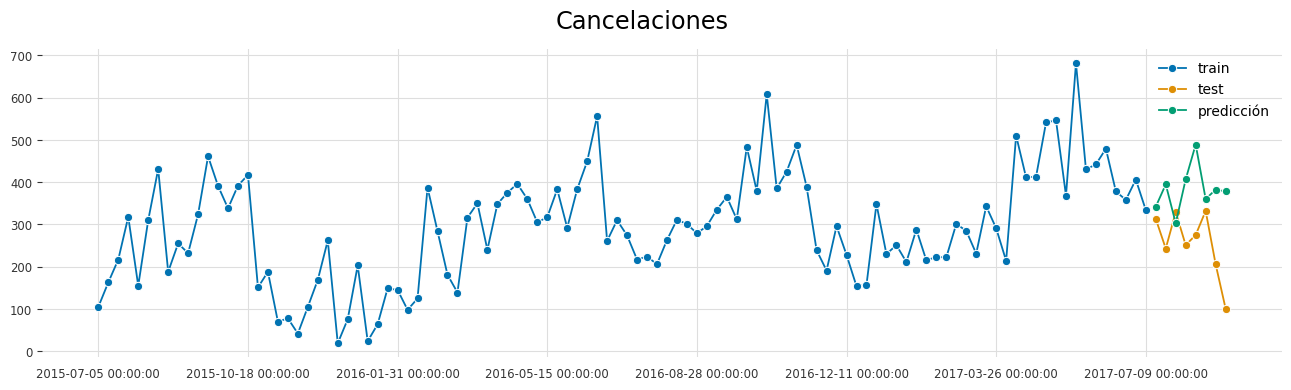

In [ ]:
from sktime.forecasting.ets import AutoETS

# step 2: especificar el forcasting horizon
fh = np.arange(1, 9)

# step 3: configurar el modelo AutoETS
ETS_reservas = AutoETS(auto=True, sp=52, n_jobs=-1)
ETS_cancelaciones = AutoETS(auto=True, sp=52, n_jobs=-1)

# step 4: ajustar el modelo a los datos de entrenamiento
ETS_reservas.fit(reservas_train)
ETS_cancelaciones.fit(cancelaciones_train)

# step 5: hacer predicciones
reservas_pred = ETS_reservas.predict(fh)
cancelaciones_pred = ETS_cancelaciones.predict(fh)

# graficar las predicciones
plot_series(reservas_train, reservas_test, reservas_pred, labels=['train', 'test', 'predicción'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, cancelaciones_pred, labels=['train', 'test', 'predicción'], title='Cancelaciones')






In [ ]:
print(ETS_reservas.summary()) 


                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  106
Model:                      ETS(AAdA)   Log Likelihood                -542.403
Date:                Fri, 31 May 2024   AIC                           1202.807
Time:                        16:48:51   BIC                           1359.950
Sample:                    07-05-2015   HQIC                          1266.498
                         - 07-09-2017   Scale                         1629.700
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.2546      0.116      2.189      0.029       0.027       0.483
smoothing_trend      2.546e-05      0.053      0.000      1.000      -0.104       0.104
smoothing_season

In [ ]:
print(ETS_cancelaciones.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  106
Model:                       ETS(ANA)   Log Likelihood                -582.528
Date:                Fri, 31 May 2024   AIC                           1277.057
Time:                        16:48:51   BIC                           1426.209
Sample:                    07-05-2015   HQIC                          1337.509
                         - 07-09-2017   Scale                         3474.568
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.4852      0.094      5.184      0.000       0.302       0.669
smoothing_seasonal   5.148e-05        nan        nan        nan         nan         nan
initial_level   

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

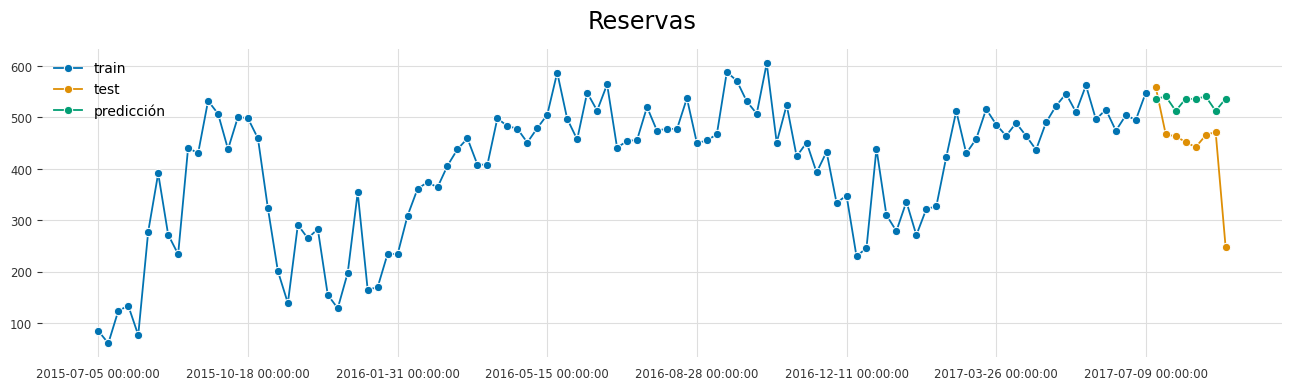

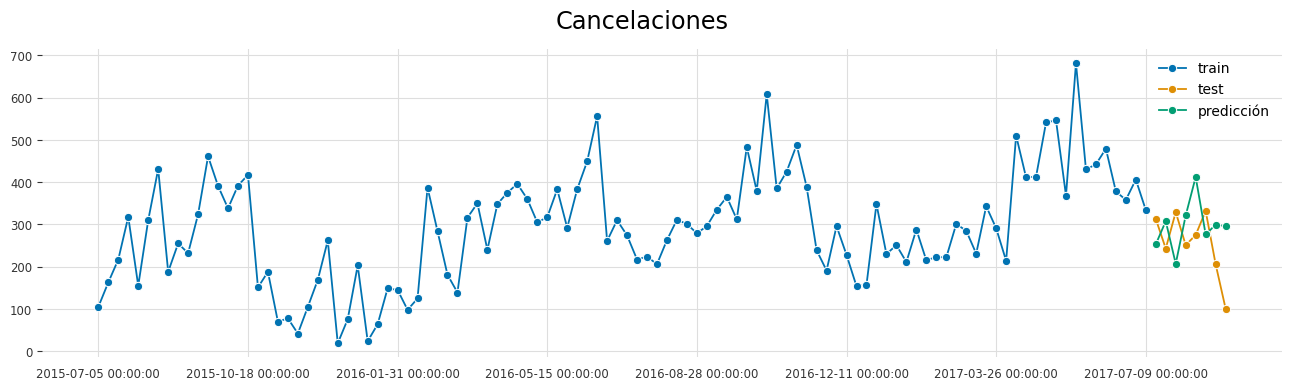

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
ETS_reservas_manual = ExponentialSmoothing(seasonal='additive', sp=4) #el error lo toma aditivo si no pongo nada
ETS_reservas_manual.fit(reservas_train)

ETS_cancelaciones_manual = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp = 52)
ETS_cancelaciones_manual.fit(cancelaciones_train)

reservas_pred_manual = ETS_reservas_manual.predict(fh)
cancelaciones_pred_manual = ETS_cancelaciones_manual.predict(fh)

plot_series(reservas_train, reservas_test, reservas_pred_manual, labels=['train', 'test', 'predicción'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, cancelaciones_pred_manual, labels=['train', 'test', 'predicción'], title='Cancelaciones')

como podemos ver, los modelos ETS no captan bien la estacionalidad de los datos y por ejemplo en las cancelaciones lo hace al reves

#### ARIMA

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

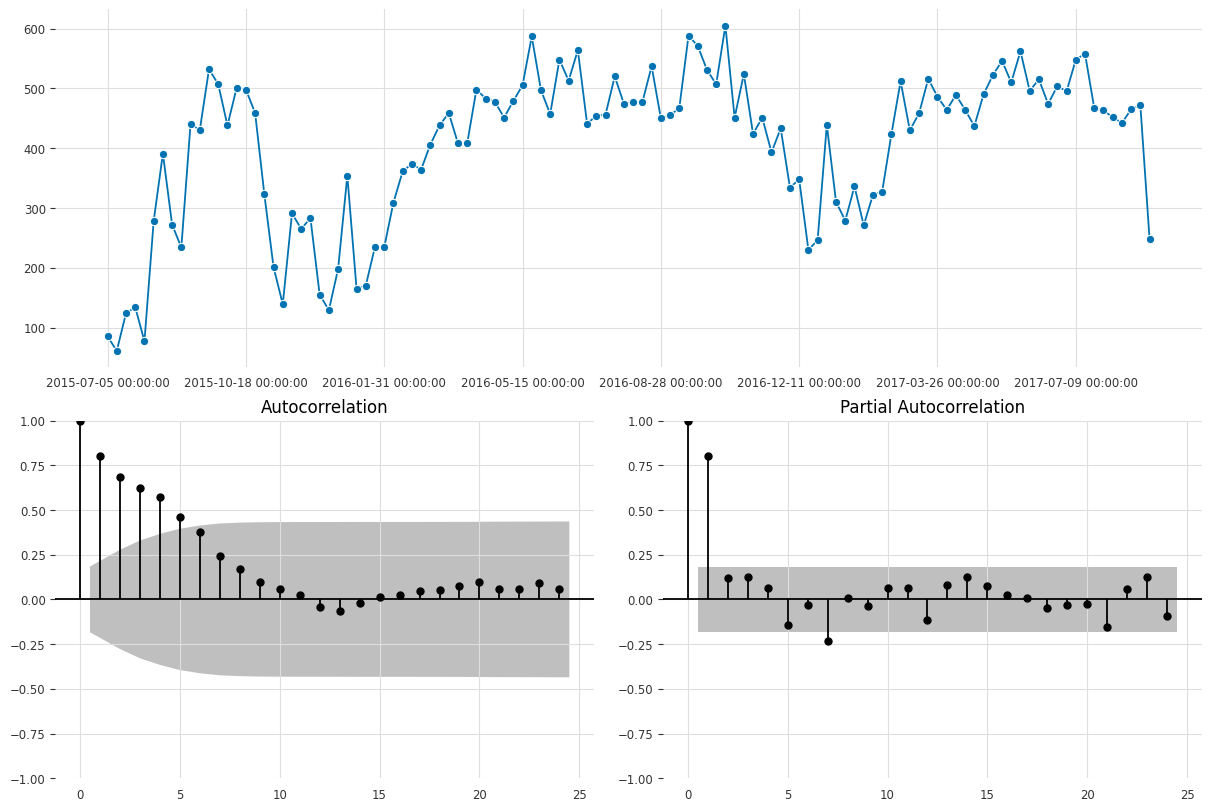

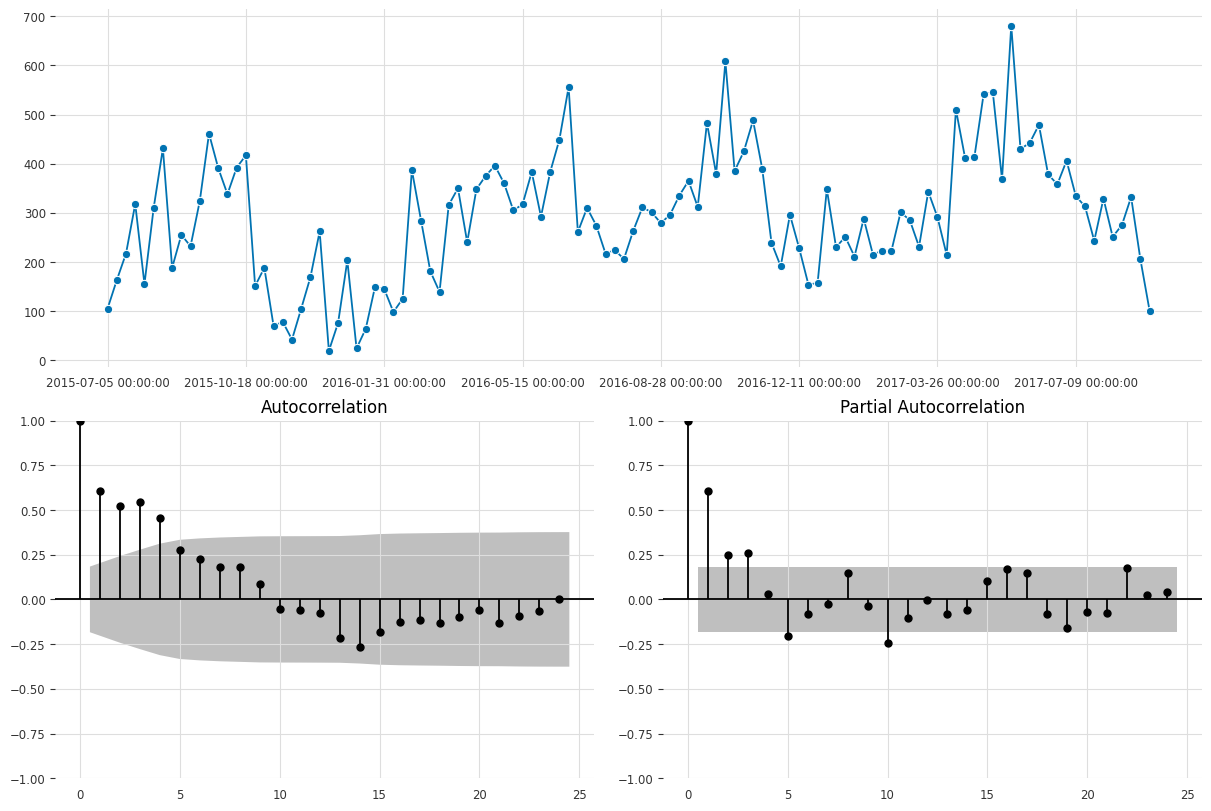

In [ ]:
# grafico de autocorrelacion y autocorrelacion parcial
from sktime.utils.plotting import plot_correlations

plot_correlations(reservas_semanales)
plot_correlations(cancelaciones_semanales)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Cancelaciones'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

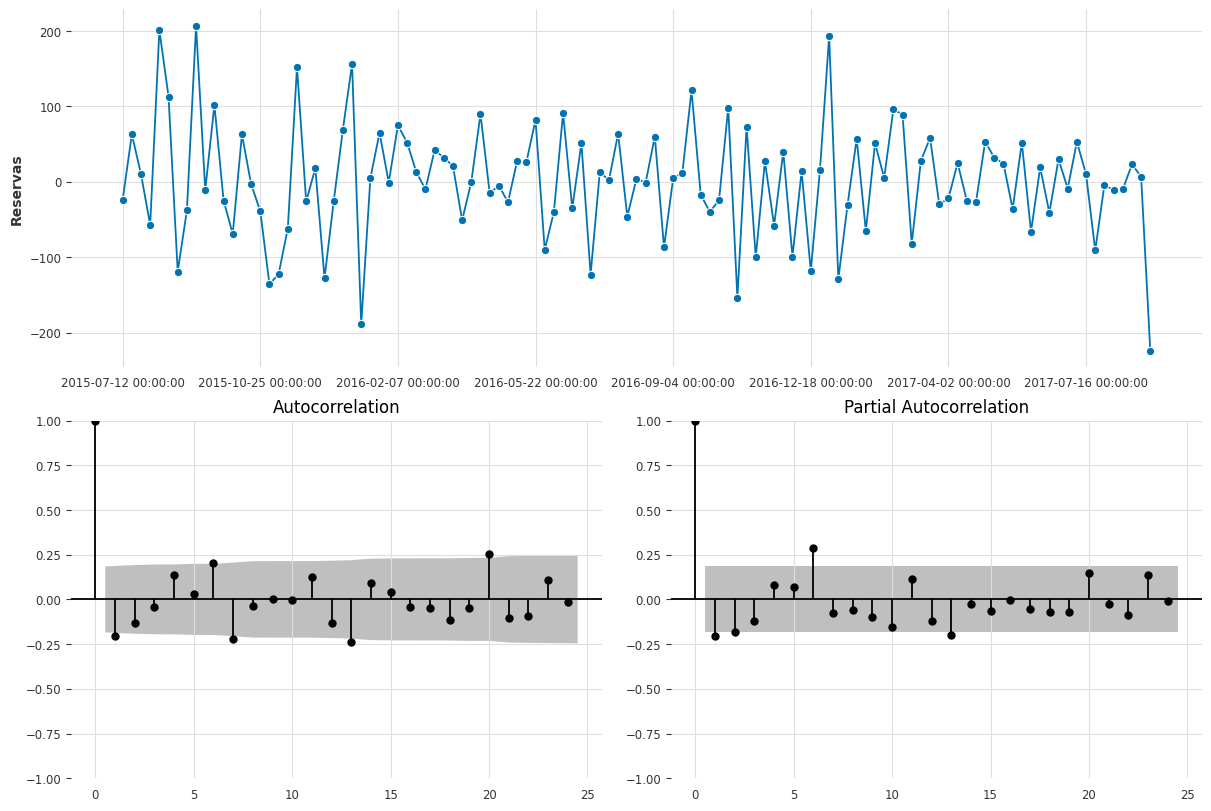

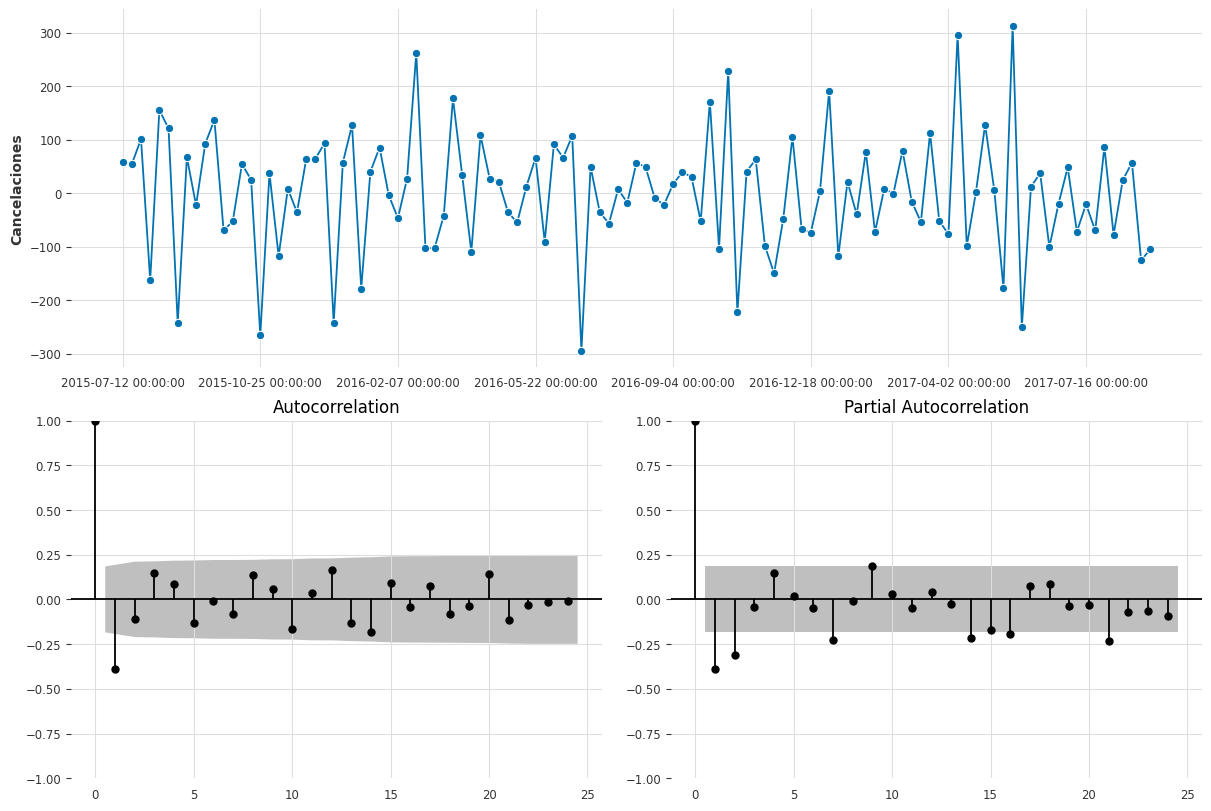

In [ ]:
plot_correlations(reservas_diff)
plot_correlations(cancelaciones_diff)

con una diferenciacion de 1 lag vemos que la tendencia desaparece y nos queda un modelo ARIMA (1,1,1) en reservas y ARIMA (3,1,2) en cancelaciones

In [ ]:
# step 2: especificar el forcasting horizon
fh = np.arange(1, 9)

# step 3: configurar el modelo Autoarima
from sktime.forecasting.arima import AutoARIMA

# ponemos un sp = 13 porque me da error con el sp = 52 (anual) y entonces hemos cogido el 13 que significa que el patron se repite cada 13 semanas (trimestralmente)
autoarima_reservas = AutoARIMA(sp = 13, suppress_warnings=True)
autoarima_cancelaciones = AutoARIMA(sp = 13,suppress_warnings=True)

# step 4: ajustar el modelo a los datos de entrenamiento
autoarima_reservas.fit(reservas_train)
autoarima_cancelaciones.fit(cancelaciones_train)

print(autoarima_cancelaciones.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  106
Model:             SARIMAX(2, 1, 2)x(0, 0, [1], 13)   Log Likelihood                -623.060
Date:                              Fri, 31 May 2024   AIC                           1258.121
Time:                                      16:49:16   BIC                           1274.044
Sample:                                  07-05-2015   HQIC                          1264.573
                                       - 07-09-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1035      0.206      0.502      0.615      -0.300       0.507
ar.L2         -0.51

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

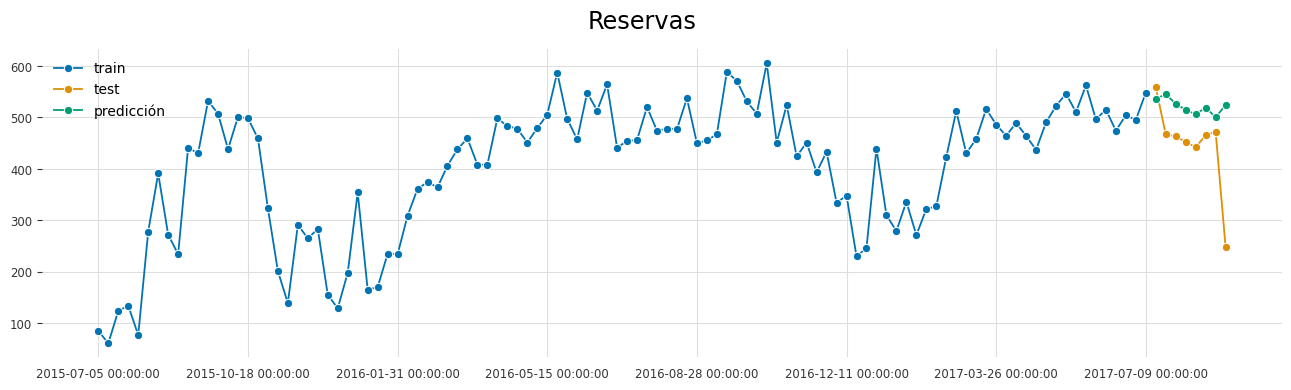

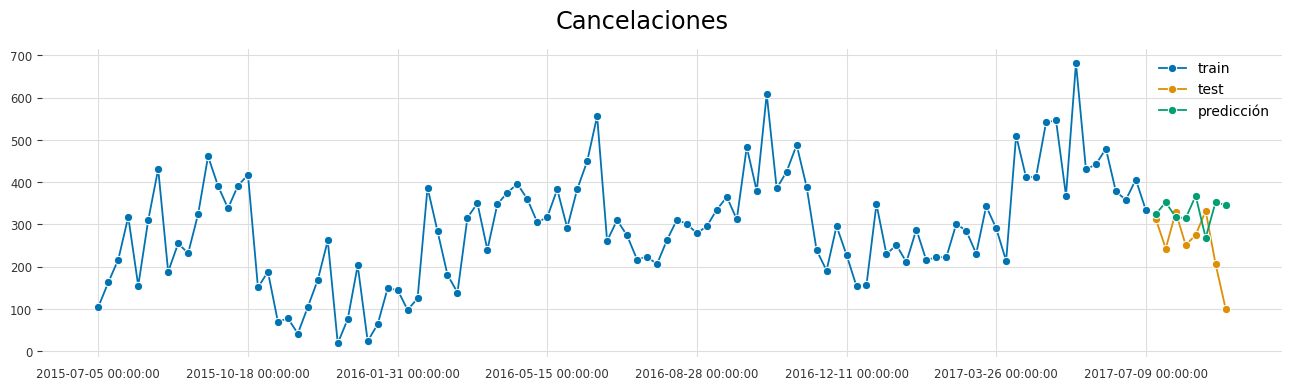

In [ ]:
# step 5: hacer predicciones
reservas_pred_autoarima = autoarima_reservas.predict(fh)
cancelaciones_pred_autoarima = autoarima_cancelaciones.predict(fh)

# graficar las predicciones
plot_series(reservas_train, reservas_test, reservas_pred_autoarima, labels=['train', 'test', 'predicción'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, cancelaciones_pred_autoarima, labels=['train', 'test', 'predicción'], title='Cancelaciones')



In [ ]:
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import mean_absolute_error

# Calcular errores para SARIMA Reservas
mse_autoarima_r = MeanSquaredError()(reservas_test, reservas_pred_autoarima)
rmse_autoarima_r = MeanSquaredError(square_root=True)(reservas_test, reservas_pred_autoarima)
mae_autoarima_r = mean_absolute_error(reservas_test, reservas_pred_autoarima)
mape_autoarima_r = mean_absolute_percentage_error(reservas_test, reservas_pred_autoarima)

# Calcular errores para SARIMA Cancelaciones
mse_autoarima_c = MeanSquaredError()(cancelaciones_test, cancelaciones_pred_autoarima)
rmse_autoarima_c = MeanSquaredError(square_root=True)(cancelaciones_test, cancelaciones_pred_autoarima)
mae_autoarima_c = mean_absolute_error(cancelaciones_test, cancelaciones_pred_autoarima)
mape_autoarima_c = mean_absolute_percentage_error(cancelaciones_test, cancelaciones_pred_autoarima)


#print de los errores
print(f"SARIMA Reservas - MSE: {mse_autoarima_r:.2f}")
print(f"SARIMA Reservas - RMSE: {rmse_autoarima_r:.2f}")
print(f"SARIMA Reservas - MAE: {mae_autoarima_r:.2f}")
print(f"SARIMA Reservas - MAPE: {mape_autoarima_r:.2f}")

print(f"SARIMA Cancelaciones - MSE: {mse_autoarima_c:.2f}")
print(f"SARIMA Cancelaciones - RMSE: {rmse_autoarima_c:.2f}")
print(f"SARIMA Cancelaciones - MAE: {mae_autoarima_c:.2f}")
print(f"SARIMA Cancelaciones - MAPE: {mape_autoarima_c:.2f}")


SARIMA Reservas - MSE: 12300.78
SARIMA Reservas - RMSE: 110.91
SARIMA Reservas - MAE: 81.02
SARIMA Reservas - MAPE: 0.24
SARIMA Cancelaciones - MSE: 13804.22
SARIMA Cancelaciones - RMSE: 117.49
SARIMA Cancelaciones - MAE: 93.09
SARIMA Cancelaciones - MAPE: 0.56


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

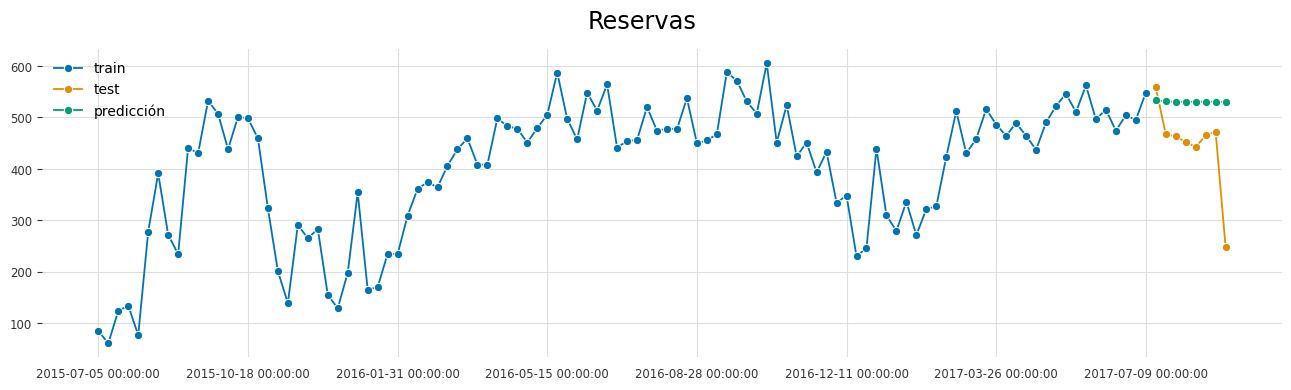

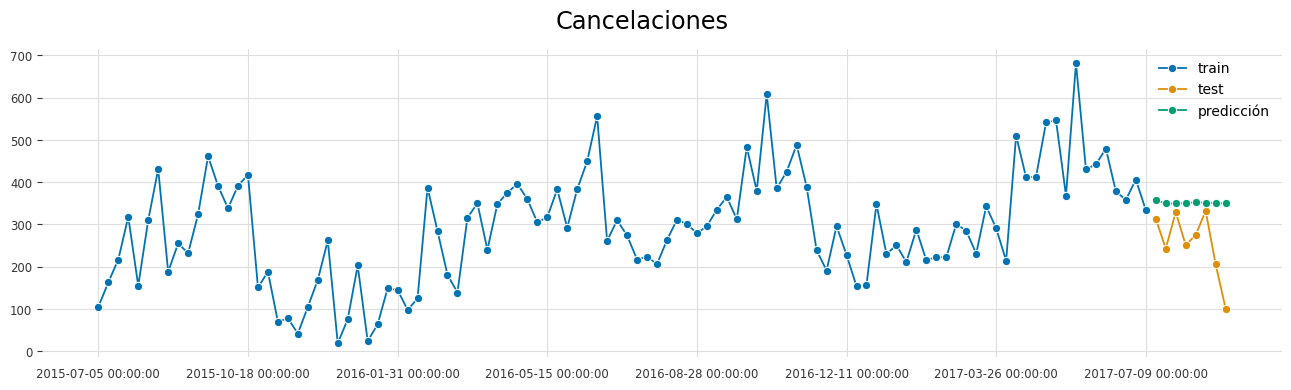

In [ ]:
# step 2: especificar el forcasting horizon
fh = np.arange(1, 9)

# step 3: configurar el modelo Arima
from statsmodels.tsa.arima.model import ARIMA

# Crear y entrenar el modelo ARIMA
arima_reservas = ARIMA(reservas_train, order=(1, 1, 1)).fit()
arima_cancelaciones = ARIMA(cancelaciones_train, order=(3, 1, 2)).fit()

# step 5: hacer predicciones
reservas_pred_arima = arima_reservas.predict(start=len(reservas_train), end=len(reservas_train)+len(reservas_test)-1, dynamic=False)
cancelaciones_pred_arima = arima_cancelaciones.predict(start=len(cancelaciones_train), end=len(cancelaciones_train)+len(cancelaciones_test)-1, dynamic=False)


# graficar las predicciones
plot_series(reservas_train, reservas_test, reservas_pred_arima, labels=['train', 'test', 'predicción'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, cancelaciones_pred_arima, labels=['train', 'test', 'predicción'], title='Cancelaciones')

In [ ]:
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import mean_absolute_error

# Calcular errores para SARIMA Reservas
mse_arima_r = MeanSquaredError()(reservas_test, reservas_pred_arima)
rmse_arima_r = MeanSquaredError(square_root=True)(reservas_test, reservas_pred_arima)
mae_arima_r = mean_absolute_error(reservas_test, reservas_pred_arima)
mape_arima_r = mean_absolute_percentage_error(reservas_test, reservas_pred_arima)

# Calcular errores para SARIMA Cancelaciones
mse_arima_c = MeanSquaredError()(cancelaciones_test, cancelaciones_pred_arima)
rmse_arima_c = MeanSquaredError(square_root=True)(cancelaciones_test, cancelaciones_pred_arima)
mae_arima_c = mean_absolute_error(cancelaciones_test, cancelaciones_pred_arima)
mape_arima_c = mean_absolute_percentage_error(cancelaciones_test, cancelaciones_pred_arima)


#print de los errores
print(f"SARIMA Reservas - MSE: {mse_arima_r:.2f}")
print(f"SARIMA Reservas - RMSE: {rmse_arima_r:.2f}")
print(f"SARIMA Reservas - MAE: {mae_arima_r:.2f}")
print(f"SARIMA Reservas - MAPE: {mape_arima_r:.2f}")

print(f"SARIMA Cancelaciones - MSE: {mse_arima_c:.2f}")
print(f"SARIMA Cancelaciones - RMSE: {rmse_arima_c:.2f}")
print(f"SARIMA Cancelaciones - MAE: {mae_arima_c:.2f}")
print(f"SARIMA Cancelaciones - MAPE: {mape_arima_c:.2f}")



SARIMA Reservas - MSE: 13793.44
SARIMA Reservas - RMSE: 117.45
SARIMA Reservas - MAE: 90.95
SARIMA Reservas - MAPE: 0.26
SARIMA Cancelaciones - MSE: 14123.06
SARIMA Cancelaciones - RMSE: 118.84
SARIMA Cancelaciones - MAE: 95.18
SARIMA Cancelaciones - MAPE: 0.57


/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

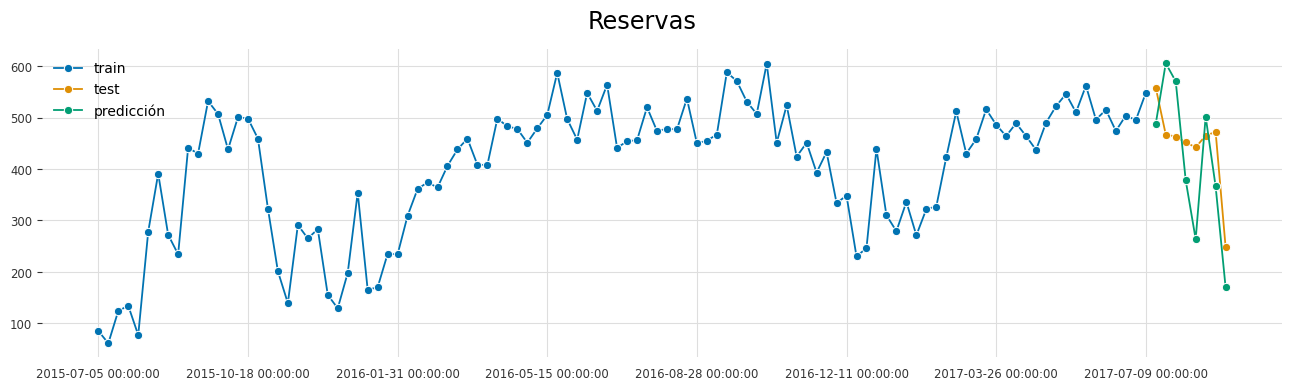

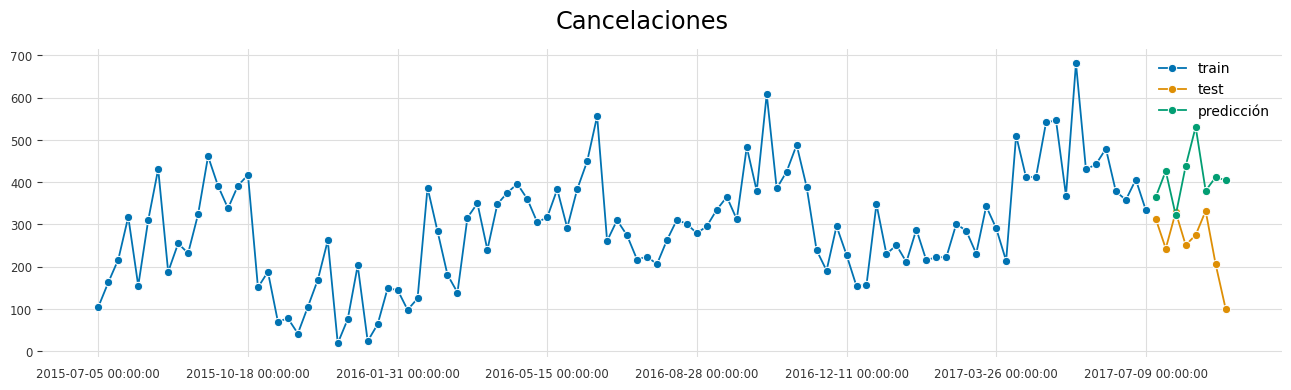

In [ ]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA para reservas
sarima_reservas = SARIMAX(reservas_train, order=(1,1,1), seasonal_order=(1,1,0,52))
fit_sarima_reservas = sarima_reservas.fit(disp=False)

# Ajustar el modelo SARIMA para cancelaciones
sarima_cancelaciones = SARIMAX(cancelaciones_train, order=(3,1,2), seasonal_order=(1,1,1,52))
fit_sarima_cancelaciones = sarima_cancelaciones.fit(disp=False)

# Predicciones para reservas
pred_sarima_reservas = fit_sarima_reservas.predict(start=len(reservas_train), end=len(reservas_train)+len(reservas_test)-1, dynamic=False)
pred_sarima_reservas = pd.Series(pred_sarima_reservas, index=reservas_test.index)

# Predicciones para cancelaciones
pred_sarima_cancelaciones = fit_sarima_cancelaciones.predict(start=len(cancelaciones_train), end=len(cancelaciones_train)+len(cancelaciones_test)-1, dynamic=False)
pred_sarima_cancelaciones = pd.Series(pred_sarima_cancelaciones, index=cancelaciones_test.index)

# graficar las predicciones
plot_series(reservas_train, reservas_test, pred_sarima_reservas, labels=['train', 'test', 'predicción'], title='Reservas')
plot_series(cancelaciones_train, cancelaciones_test, pred_sarima_cancelaciones, labels=['train', 'test', 'predicción'], title='Cancelaciones')

In [ ]:
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import mean_absolute_error

# Calcular errores para SARIMA Reservas
mse_sarima_r = MeanSquaredError()(reservas_test, pred_sarima_reservas)
rmse_sarima_r = MeanSquaredError(square_root=True)(reservas_test, pred_sarima_reservas)
mae_sarima_r = mean_absolute_error(reservas_test, pred_sarima_reservas)
mape_sarima_r = mean_absolute_percentage_error(reservas_test, pred_sarima_reservas)

# Calcular errores para SARIMA Cancelaciones
mse_sarima_c = MeanSquaredError()(cancelaciones_test, pred_sarima_cancelaciones)
rmse_sarima_c = MeanSquaredError(square_root=True)(cancelaciones_test, pred_sarima_cancelaciones)
mae_sarima_c = mean_absolute_error(cancelaciones_test, pred_sarima_cancelaciones)
mape_sarima_c = mean_absolute_percentage_error(cancelaciones_test, pred_sarima_cancelaciones)


#print de los errores
print(f"SARIMA Reservas - MSE: {mse_sarima_r:.2f}")
print(f"SARIMA Reservas - RMSE: {rmse_sarima_r:.2f}")
print(f"SARIMA Reservas - MAE: {mae_sarima_r:.2f}")
print(f"SARIMA Reservas - MAPE: {mape_sarima_r:.2f}")

print(f"SARIMA Cancelaciones - MSE: {mse_sarima_c:.2f}")
print(f"SARIMA Cancelaciones - RMSE: {rmse_sarima_c:.2f}")
print(f"SARIMA Cancelaciones - MAE: {mae_sarima_c:.2f}")
print(f"SARIMA Cancelaciones - MAPE: {mape_sarima_c:.2f}")


SARIMA Reservas - MSE: 11473.81
SARIMA Reservas - RMSE: 107.12
SARIMA Reservas - MAE: 98.74
SARIMA Reservas - MAPE: 0.23
SARIMA Cancelaciones - MSE: 34185.80
SARIMA Cancelaciones - RMSE: 184.89
SARIMA Cancelaciones - MAE: 155.30
SARIMA Cancelaciones - MAPE: 0.85


/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/sktime/performance_metrics/forecasting/_classes.py:478: UserWarning: y_

#### Theta

<Axes: xlabel='time'>

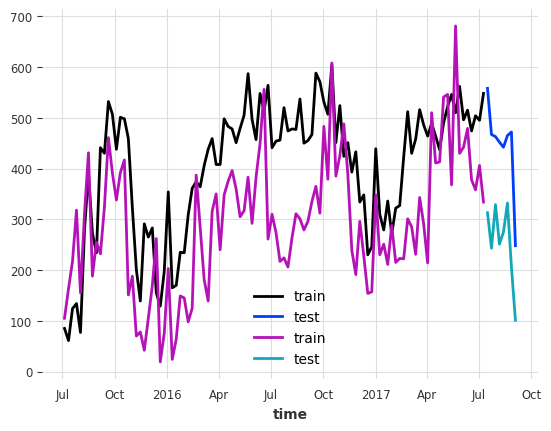

In [ ]:
from darts import TimeSeries

reservas_train_ts = TimeSeries.from_series(reservas_train['Reservas'])
reservas_test_ts = TimeSeries.from_series(reservas_test['Reservas'])
reservas_train_ts.plot(label='train')
reservas_test_ts.plot(label='test')

cancelaciones_train_ts = TimeSeries.from_series(cancelaciones_train['Cancelaciones'])
cancelaciones_test_ts = TimeSeries.from_series(cancelaciones_test['Cancelaciones'])
cancelaciones_train_ts.plot(label='train')
cancelaciones_test_ts.plot(label='test')

In [ ]:
from darts.models import Theta, FourTheta
from darts.metrics import mape

model_r =Theta(seasonality_period=52) # Supone Theta 2
model_r.fit(reservas_train_ts)
forecast = model_r.predict(len(reservas_test_ts))
print("model reservas {} obtains MAPE: {:.2f}%".format(model_r, mape(reservas_test_ts, forecast)))

model reservas Theta(seasonality_period=52) obtains MAPE: 54.99%


<Axes: xlabel='time'>

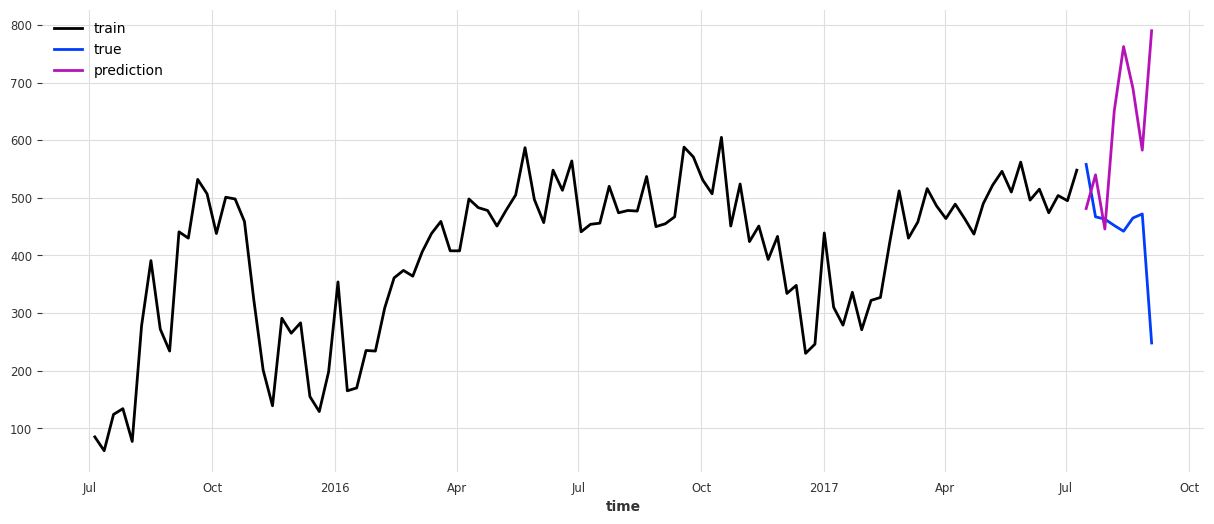

In [ ]:
# %%
plt.rcParams["figure.figsize"] = (15,6)
reservas_train_ts.plot(label="train")
reservas_test_ts.plot(label="true")
forecast.plot(label="prediction")

In [ ]:
from darts.models import Theta, FourTheta
from darts.metrics import mape

model_c =Theta(seasonality_period=52) # Supone Theta 2
model_c.fit(cancelaciones_train_ts)
forecast = model_c.predict(len(cancelaciones_test_ts))
print("model cancelaciones {} obtains MAPE: {:.2f}%".format(model_c, mape(cancelaciones_test_ts, forecast)))

model cancelaciones Theta(seasonality_period=52) obtains MAPE: 94.56%


<Axes: xlabel='time'>

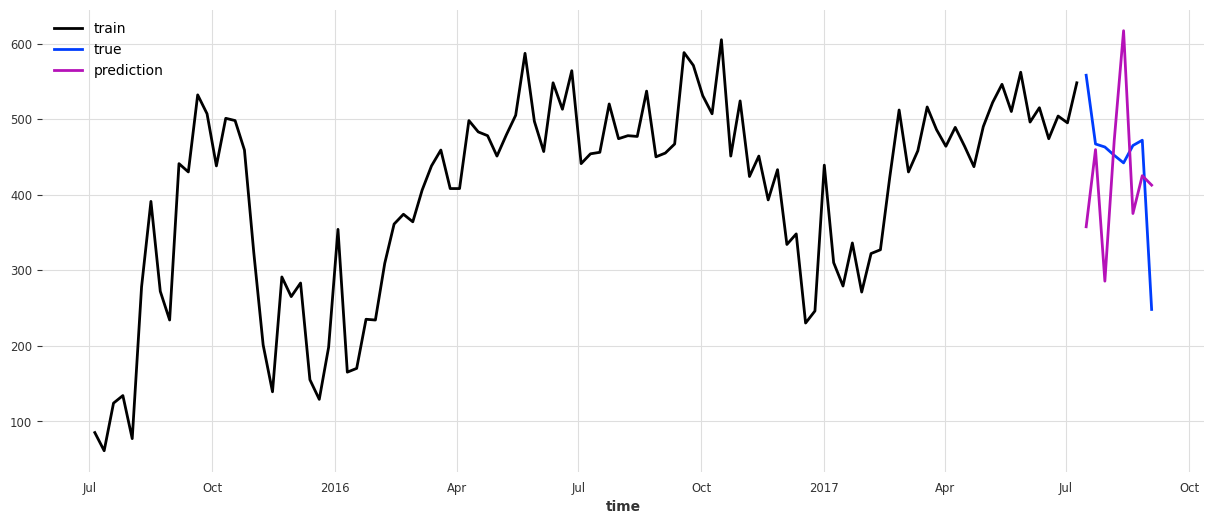

In [ ]:
plt.rcParams["figure.figsize"] = (15,6)
reservas_train_ts.plot(label="train")
reservas_test_ts.plot(label="true")
forecast.plot(label="prediction")

In [ ]:
# esto se puede hacer con darts pero esto es para ver a lo bruto lo que hace el modelo
# Search for the best theta parameter, by trying 50 different values
thetas = 2- np.linspace(-10, 10, 50) # 50 valores entre -10 y 10 y lo sumo o resto a 2


best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta, seasonality_period=52)
    model.fit(reservas_train_ts)
    pred_theta = model.predict(len(reservas_test_ts))
    res = mape(reservas_test_ts, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


print(best_mape)
print(best_theta)



40.38996398746346
0.16326530612244916


In [ ]:

# %%
best_theta_model = Theta(best_theta, seasonality_period=52)
best_theta_model.fit(reservas_train_ts)
pred_best_theta = best_theta_model.predict(len(reservas_test_ts))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(reservas_test_ts, pred_best_theta), best_theta
    )
)

The MAPE is: 40.39, with theta = 0.16326530612244916.


<Axes: xlabel='time'>

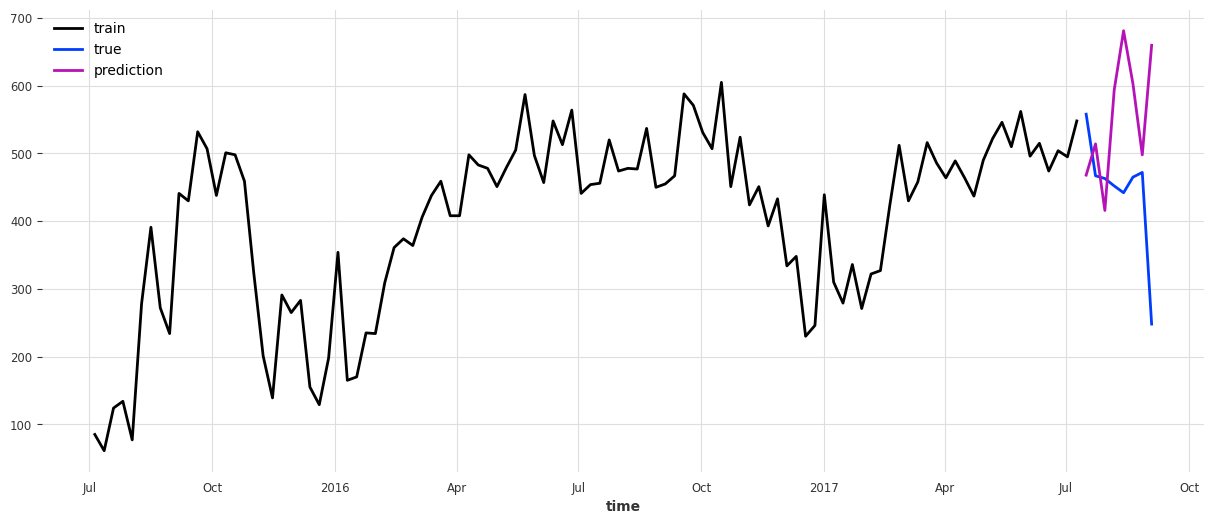

In [ ]:
# %%
reservas_train_ts.plot(label="train")
reservas_test_ts.plot(label="true")
pred_best_theta.plot(label="prediction")

In [ ]:
thetas = 2- np.linspace(-10, 10, 50) # 50 valores entre -10 y 10 y lo sumo o resto a 2


best_mape = float("inf")
best_theta = 0

for theta in thetas:

    model = Theta(theta, seasonality_period=52)
    model.fit(cancelaciones_train_ts)
    pred_theta = model.predict(len(cancelaciones_test_ts))
    res = mape(cancelaciones_test_ts, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


print(best_mape)
print(best_theta)

62.2337766162285
0.16326530612244916


In [ ]:
# %%
best_theta_model = Theta(best_theta, seasonality_period=52)
best_theta_model.fit(cancelaciones_train_ts)
pred_best_theta = best_theta_model.predict(len(cancelaciones_test_ts))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(cancelaciones_test_ts, pred_best_theta), best_theta
    )
)

The MAPE is: 62.23, with theta = 0.16326530612244916.


<Axes: xlabel='time'>

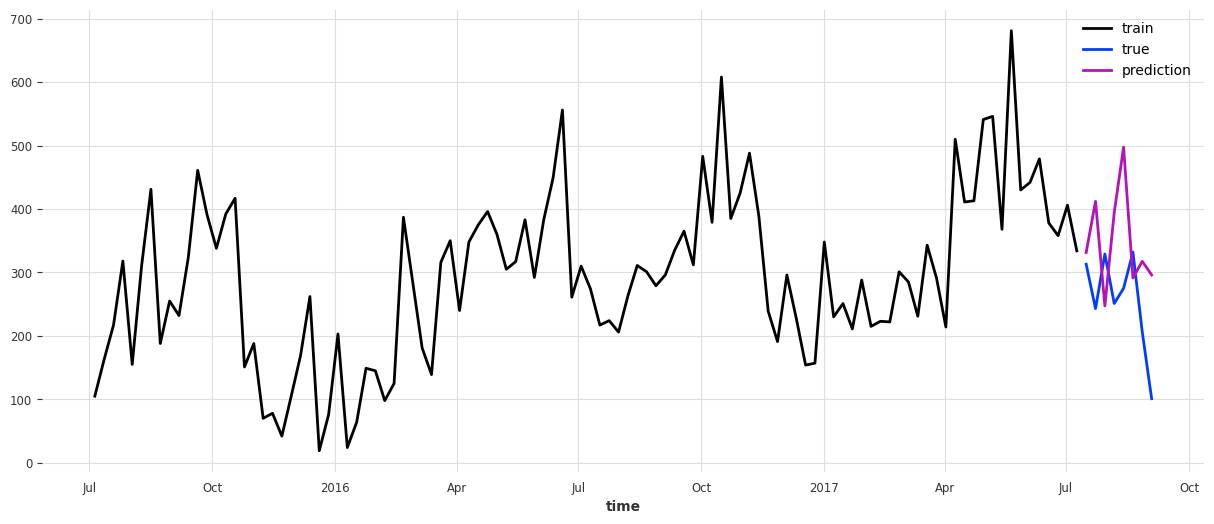

In [ ]:
# %%
cancelaciones_train_ts.plot(label="train")
cancelaciones_test_ts.plot(label="true")
pred_best_theta.plot(label="prediction")

#### 4Theta

In [ ]:
model =FourTheta(seasonality_period=52)
model.fit(reservas_train_ts)
forecast = model.predict(len(reservas_test_ts))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(reservas_test_ts, forecast)))

model FourTheta(seasonality_period=52) obtains MAPE: 54.67%


In [ ]:
# %%
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

NameError: name 'train' is not defined

In [ ]:
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4], #no se le puede dar el valor de 0 a theta
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=train,
                                forecast_horizon=36, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=False , #lo pongo false porque sino me sale un warning
                                n_jobs=-1)

best_grid_model

In [ ]:
modelo=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.MULTIPLICATIVE,
                 trend_mode=TrendMode.LINEAR
                 )
modelo.fit(train)
pred_modelo = modelo.predict(len(val))

train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction")

In [ ]:

# %%
train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction 4Theta")
pred_best_theta.plot(label="prediction Theta")
